# Metaheuristics
### Non Linear Optimization
###### Rafael Barsotti - 31/03/2020

###### Ackley function 

Objective:

$argmin(f(x,y))$

$f(x,y) := -20e^{-0.2\sqrt{0.5(x^2 + y^2)}} - e^{0.5((cos(2\pi x) + cos (2 \pi y))} + e + 20$ 

$-5 \leq x,y \leq 5$

Global Minimum at:

$f(0,0) = 0$

[Test Functions for Optimization](https://en.wikipedia.org/wiki/Test_functions_for_optimization)

In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
import math as m
import random
from IPython.display import Image
from IPython.core.display import HTML
import warnings
warnings.filterwarnings('ignore')

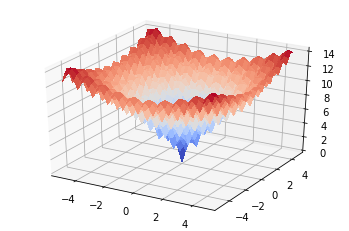

In [2]:
fig = plt.figure()
ax = fig.gca(projection='3d')

X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = (-20*np.e**(-0.2*np.sqrt(0.5*(X**2 + Y**2))) -np.e**(0.5*(np.cos(2*np.pi*X) + np.cos(2*np.pi*Y))) + np.e + 20)

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
plt.show()

### Gradient Descent

$a_n = a_n -\alpha  \nabla f(x,y)$

$\frac{\partial f(x,y)}{\partial x} = \frac{2.82843 x e^{-0.141421 \sqrt{x^2 + y^2}}}{\sqrt{x^2 + y^2}} + \pi sin(2 \pi x ) e^{0.5(cos(2 \pi x) + cos(2 \pi y))}$

$\frac{\partial f(x,y)}{\partial y} = \frac{2.82843 y e^{-0.141421 \sqrt{x^2 + y^2}}}{\sqrt{x^2 + y^2}} + \pi sin(2 \pi y ) e^{0.5(cos(2 \pi x) + cos(2 \pi y))}$

In [3]:
def f(x,y):
    z = (-20*np.e**(-0.2*np.sqrt(0.5*(x**2 + y**2))) -np.e**(0.5*(np.cos(2*np.pi*x) + np.cos(2*np.pi*y))) + np.e + 20)
    return z

def gradientDescent(x, y, max_iterations, alpha):
    for i in range(max_iterations):
        deltax = (2.82843*x*m.e**(-0.141421 * m.sqrt(x**2 + y**2)))/(m.sqrt(x**2 + y **2)) + \
            m.pi * m.sin(2*m.pi*x)*m.e**(0.5*(m.cos(2*m.pi*x) + m.cos(2*m.pi*y)))
        deltay = (2.82843*y*m.e**(-0.141421 * m.sqrt(x**2 + y**2)))/(m.sqrt(x**2 + y **2)) + \
            m.pi * m.sin(2*m.pi*y)*m.e**(0.5*(m.cos(2*m.pi*x) + m.cos(2*m.pi*y)))
        x = x -alpha*deltax
        y = y -alpha*deltay
        return [x,y]

x = np.random.uniform(-5,5)
y = np.random.uniform(-5,5)
print('Starting Point: {} \n f(x,y): {}'.format([x,y],f(x,y)))
ans = gradientDescent(x,y,10**6,0.1)
z = f(ans[0],ans[1])
print('Finishing Point: {} \n f(x,y): {}'.format(ans,z))

Starting Point: [4.918948776889943, -2.7136533197922663] 
 f(x,y): 12.30020733101107
Finishing Point: [5.018686846203109, -3.074744869341119] 
 f(x,y): 11.451670857138431


### Simulated Annealing (SA)

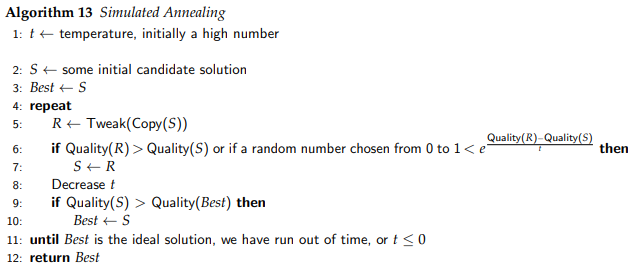

In [4]:
Image('SA.png')

In [5]:
# Quality Function
# Use f(x,y)

# Tweak Function
def tweak(S):
    tweaked = np.array(S)
    tweaked = np.random.normal(np.average(tweaked),np.std(tweaked),2)
    return tweaked

# Probability Function
def p(t,R,S):
    prob = m.e**((R - S)/t)
    return prob

def startingPoint():
    sp = []
    while len(sp) < 2:
        sp.append(np.random.uniform(-5,5))
    return sp

def SA(temperature,max_iterations,alpha):
    S = startingPoint()
    z = f(S[0],S[1])
    print('Starting Point: {} \n f(x,y): {}'.format(S,z))
    best = S
    c = 0
    while temperature >= 0 and c <= max_iterations:
        R = tweak(S)
        qualityR = f(R[0],R[1])
        qualityS = f(S[0],S[1])
        if qualityS > qualityR or np.random.uniform(0,1) < p(temperature,qualityS,qualityR):
            S = R
        temperature -= 1
        if qualityS < qualityR:
            best = S
        c += 1
    z = f(best[0],best[1])
    ans = 'Finishing Point: {} \n f(x,y): {}'.format(best,z)
    print(ans)

SA(10**3,10**6,0.01)

Starting Point: [-2.5297909940561736, 2.516815512303764] 
 f(x,y): 10.271951153064789
Finishing Point: [-0.41920194 -0.41920194] 
 f(x,y): 3.9093922789306887


### Genetic Algorithm (GA)

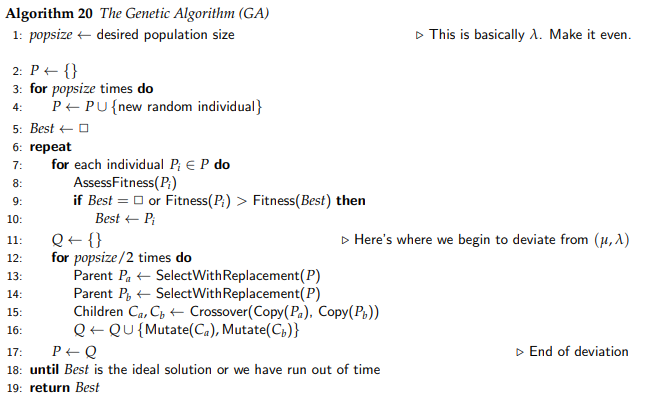

In [6]:
Image(r"GA.png")

In [7]:
# Fitness Function
# Use f(x,y)

# Mutate Function
# Use the previous tweak function

# Crossover Function 
def crossover(a,b):
    c0 = (a[0] + b[0])/2
    c1 = (a[1] + b[1])/2
    return [c0,c1]

# Initial Population
def initPopulation(popsize):
    p = []
    for i in range(popsize):
        pi = [np.random.uniform(-5,5),np.random.uniform(-5,5)]
        p.append(pi)
    return p

# Breeding
def breeding(population,popsize):
    q = []
    for i in range(int(round(popsize))):
        p0 = random.choice(population)
        p1 = random.choice(population)
        child = tweak(crossover(p0,p1))
        q.append(child)
        return q
        
# First Place in Pop
def firstPlace(population):
    r = [20,20]
    for i in population:
        fitness_i = f(i[0],i[1])
        fitness_r = f(r[0],r[0])
        if fitness_i < fitness_r:
            r = i
    return r
        
def GA(popsize,max_iterations):
    pop = initPopulation(popsize)
    c = 0
    best = firstPlace(pop)
    initbest = best
    while c <= max_iterations:
        fitness_best = f(best[0],best[1])
        for i in pop:
            fitness_i = f(i[0],i[1])
            if fitness_i < fitness_best:
                best = i
        pop = breeding(pop,popsize)
        c += 1
    best = list(best)
    return (initbest,best)

result = GA(100,10**3)
init_gene = result[0]
final_gene = result[1]
f0 = f(init_gene[0],init_gene[1])
fn = f(final_gene[0],final_gene[1])
print('Initial Best Gene: {} \n f(x,y): {}\nFinal Best Gene: {} \n f(x,y): {}'.format(init_gene,f0,final_gene,fn))

Initial Best Gene: [0.1251967914952612, 0.30847283837630446] 
 f(x,y): 2.448586249334763
Final Best Gene: [0.1251967914952612, 0.30847283837630446] 
 f(x,y): 2.448586249334763
